In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../DATA/hearing_test.csv'
                )

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,5000.0,51.60900,11.287001,18.0,43.0,51.0,60.0,90.0
physical_score,5000.0,32.76026,8.169802,-0.0,26.7,35.3,38.9,50.0
test_result,5000.0,0.60000,0.489947,0.0,0.0,1.0,1.0,1.0


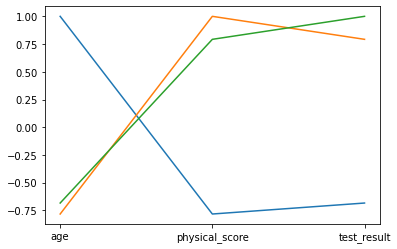

In [6]:
plt.plot(df.corr())

In [7]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

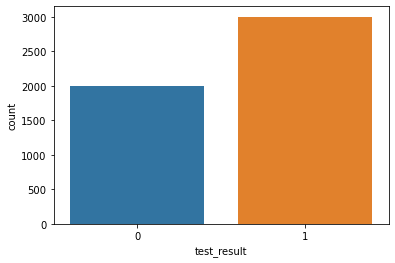

In [8]:
sns.countplot(data=df, x='test_result')

<AxesSubplot:xlabel='test_result', ylabel='age'>

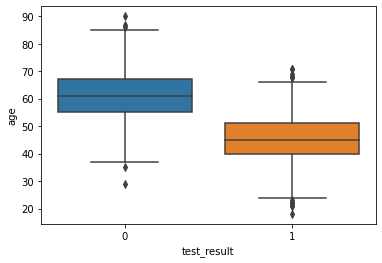

In [9]:
sns.boxplot(data=df, x='test_result', y='age')

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

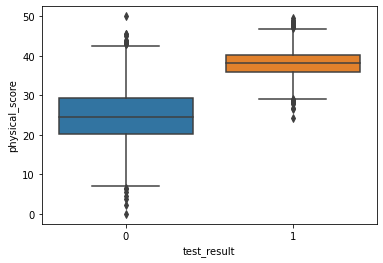

In [10]:
sns.boxplot(data=df, x='test_result', y='physical_score')

<AxesSubplot:xlabel='physical_score', ylabel='age'>

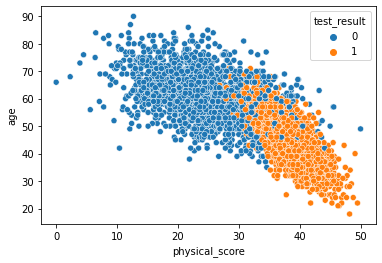

In [11]:
sns.scatterplot(data=df, x='physical_score', y='age', hue='test_result')

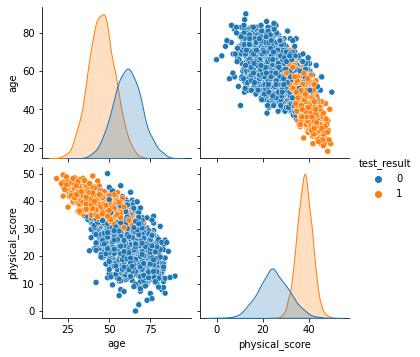

In [12]:
sns.pairplot(df,hue='test_result')

<AxesSubplot:>

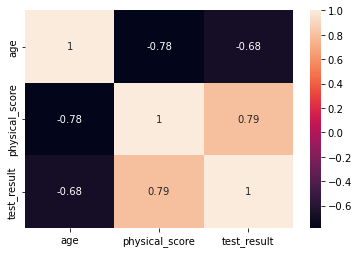

In [13]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

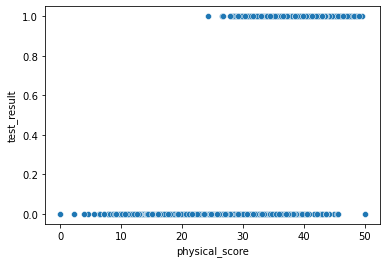

In [14]:
sns.scatterplot(x='physical_score',y='test_result',data=df)

<AxesSubplot:xlabel='age', ylabel='test_result'>

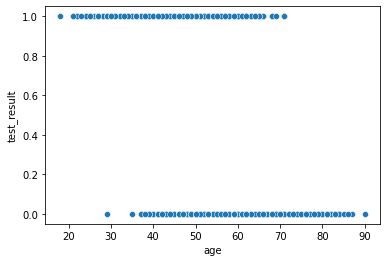

In [15]:
sns.scatterplot(data=df, x='age', y='test_result')

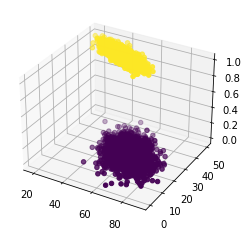

In [16]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

In [17]:
X = df.drop('test_result', axis=1)
y = df['test_result']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler= StandardScaler()

In [22]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression()

In [25]:
model.fit(scaled_X_train, y_train)

LogisticRegression()

In [26]:
model.coef_

array([[-0.96752412,  3.51478169]])

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score

In [28]:
pred = model.predict(scaled_X_test)

In [29]:
accuracy_score(y_test, pred)

0.9084848484848485

In [30]:
confusion_matrix(y_test, pred)

array([[573,  90],
       [ 61, 926]], dtype=int64)

In [31]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       634
           1       0.94      0.91      0.92      1016

    accuracy                           0.91      1650
   macro avg       0.90      0.91      0.90      1650
weighted avg       0.91      0.91      0.91      1650



In [32]:
X_train.iloc[0]

age               56.0
physical_score    14.4
Name: 1522, dtype: float64

In [33]:
y_train.iloc[0]

0

In [34]:
model.predict_proba(X_train.iloc[0].values.reshape(1, -1))

array([[0.95431079, 0.04568921]])

In [35]:
model.predict(X_train.iloc[0].values.reshape(1, -1))

array([0], dtype=int64)

In [36]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve

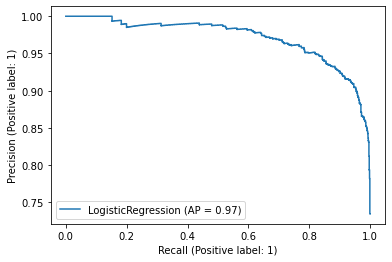

In [37]:
plot_precision_recall_curve(model,scaled_X_test,y_test)

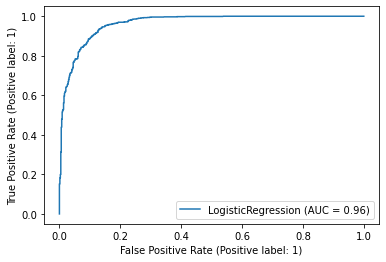

In [38]:
plot_roc_curve(model,scaled_X_test,y_test)